In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
from dorchester import dotdensity

In [40]:
import fiona

In [41]:
from shapely.ops import unary_union
from shapely.geometry import shape

In [42]:
SUFFOLK = "../tests/data/suffolk.geojson"

In [43]:
BLUE = '#6699cc'
GRAY = '#999999'

In [57]:
def plot(feature, points):
    coords = [(p[0], p[1]) for p in points]
    x, y = zip(*coords)
    plt.plot(*zip(*feature['geometry']['coordinates'][0]), linewidth=.5, color=GRAY)
    plt.scatter(x, y, s=1, c=BLUE)

In [45]:
with fiona.open(SUFFOLK) as src:
    print(len(src))

9170


In [46]:
with fiona.open(SUFFOLK) as src:
    blocks = [shape(f["geometry"]) for f in src]
    boundary = unary_union(blocks)

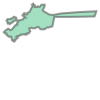

In [47]:
boundary

In [48]:
with fiona.open(SUFFOLK) as src:
    populated = [b for b in src if b['properties']['POP10'] > 0]

In [49]:
block = populated[0]

In [50]:
block

{'type': 'Feature',
 'id': '1',
 'properties': OrderedDict([('id', '126596'),
              ('BLOCKCE', '1019'),
              ('BLOCKID10', '250251304041019'),
              ('COUNTYFP10', '025'),
              ('HOUSING10', 14),
              ('PARTFLG', 'N'),
              ('POP10', 45),
              ('STATEFP10', '25'),
              ('TRACTCE10', '130404')]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(-71.157072, 42.261327),
    (-71.157196, 42.26181),
    (-71.157279, 42.262166),
    (-71.15749, 42.263064),
    (-71.15752499999999, 42.263183999999995),
    (-71.157609, 42.263433),
    (-71.157761, 42.263738),
    (-71.157552, 42.263797),
    (-71.15745199999999, 42.263785999999996),
    (-71.157381, 42.263743),
    (-71.15720999999999, 42.263616),
    (-71.156892, 42.263312),
    (-71.156545, 42.263016),
    (-71.15630399999999, 42.26282),
    (-71.15590999999999, 42.262544999999996),
    (-71.156427, 42.26201),
    (-71.157072, 42.261327)]]}}

In [51]:
points, err = dotdensity.points_in_feature(block, 'POP10')

In [52]:
points

[Point(x=-71.15766968084866, y=42.263689453029514, group='POP10', fid='1'),
 Point(x=-71.15732880295164, y=42.26366935830521, group='POP10', fid='1'),
 Point(x=-71.15734017940618, y=42.26345187954416, group='POP10', fid='1'),
 Point(x=-71.1573078882623, y=42.26339069381017, group='POP10', fid='1'),
 Point(x=-71.15716433200491, y=42.26339963862681, group='POP10', fid='1'),
 Point(x=-71.1571392405434, y=42.26341499519667, group='POP10', fid='1'),
 Point(x=-71.15630185880073, y=42.26278092528775, group='POP10', fid='1'),
 Point(x=-71.15623292030357, y=42.262447287669346, group='POP10', fid='1'),
 Point(x=-71.15601579274644, y=42.26248268488709, group='POP10', fid='1'),
 Point(x=-71.15620333311342, y=42.26274969304111, group='POP10', fid='1'),
 Point(x=-71.15691563136002, y=42.26167809272185, group='POP10', fid='1'),
 Point(x=-71.15701032144956, y=42.26174685332963, group='POP10', fid='1'),
 Point(x=-71.15696647743232, y=42.261704953946236, group='POP10', fid='1'),
 Point(x=-71.15705998384

In [53]:
err

Error(offset=-1, group='POP10', fid='1')

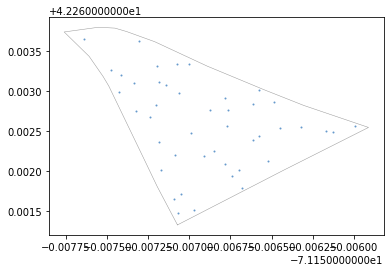

In [54]:
points, err = dotdensity.points_in_feature(block, 'POP10')
plot(block, points)

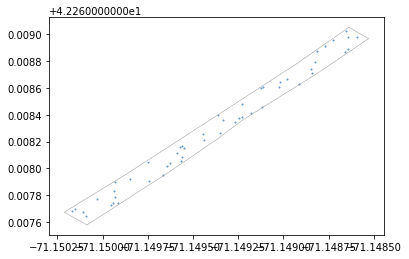

In [55]:
points, err = dotdensity.points_in_feature(populated[1], "POP10")
plot(populated[1], points)

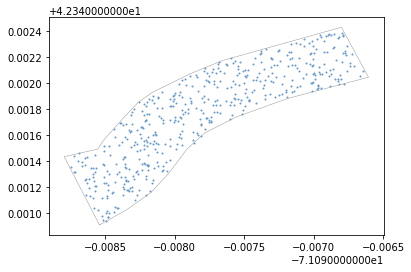

In [56]:
points, err = dotdensity.points_in_feature(populated[2], "POP10")
plot(populated[2], points)